In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Files to load
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [4]:
# City data
city_data = pd.read_csv(city_data_to_load) 
city_data.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Ride data
ride_data = pd.read_csv(ride_data_to_load) 
ride_data.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,14/01/19 10:14,13.83,5.739410e+12
1,South Michelleport,04/03/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,24/02/19 4:29,33.44,2.005070e+12
3,Rodneyfort,10/02/19 23:22,23.44,5.149250e+12
4,South Jack,06/03/19 4:28,34.58,3.908450e+12
5,South Latoya,11/03/19 12:26,9.52,1.995000e+12
6,New Paulville,27/02/19 11:17,43.25,7.932080e+11
7,Simpsonburgh,26/04/19 0:43,35.98,1.119540e+11
8,South Karenland,08/01/19 3:28,35.09,7.995620e+12
9,North Jasmine,09/03/19 6:26,42.81,5.327640e+12


In [6]:
# Creation of DataFrames
city_df = pd.DataFrame(city_data)
ride_df = pd.DataFrame(ride_data)

## City df inspection

In [7]:
#City df data inspection
# Null values inspection
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# Get the columns and the rows that are not null.
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the type of data
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Get the unique values of the type of city.
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# Get the number of data points for each type of city
urban_cities = sum(city_df["type"] == "Urban")
suburban_cities = sum(city_df["type"] == "Suburban")
rural_cities = sum(city_df["type"] == "Rural")

## Ride df Inspection

In [12]:
# Ride  df data inspection
# Null values inspection
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the type of data
ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

## Merging of the df's

In [ ]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

## Creating dataframes for each type of city

In [18]:
# Urban cities dataframes
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,04/03/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,24/02/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,10/02/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,06/03/19 4:28,34.58,3.908450e+12,46,Urban


In [19]:
# Subrban cities dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,27/01/19 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,07/04/19 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,17/01/19 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,27/02/19 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,19/04/19 1:06,37.78,2.273050e+12,12,Suburban


In [20]:
# Rural cities dataframes
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,13/04/19 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,02/02/19 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,27/03/19 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,23/02/19 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,06/05/19 8:57,51.80,4.018030e+12,2,Rural


## Counting the number of rides for each city type

In [27]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [28]:
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [29]:
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

## Counting the number of rides for each city type

In [31]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [32]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [33]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

## Counting the number of rides for each city type

In [36]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [37]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [38]:
# Get the average number of drivers for each urban city.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

## Create Bubble Charts
Conditions: 
    The x-axis is the number of rides for each city.
    The y-axis is the average fare for each city.
    The size of each marker is the average number of drivers in each city.

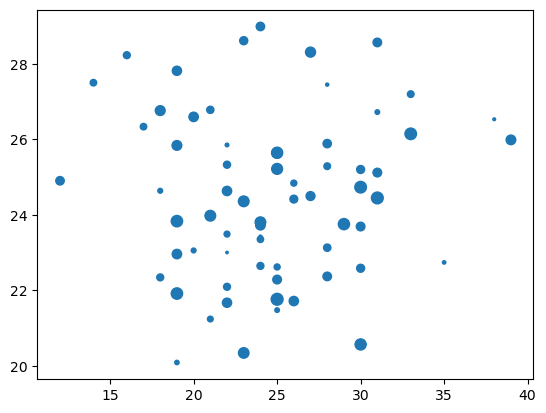

In [40]:
# Create the urban city bubble chart
plt.scatter(urban_ride_count, urban_avg_fare, s = urban_driver_count)
